# IND320 – Compulsory Work 1


**Navn:**  Adham Khalil Al Sahli    
**Dato:**  21.09.2025

### AI-bruk
- 
  Jeg har brukt ChatGPT som hjelp underveis:
- Generering av forslag til Streamlit-kode (f.eks. for `LineChartColumn` og sidebar).  
- Feilsøking av git/VS Code-problemer.  
    -  Jeg møtte utfordringer med å pushe filer fordi jeg var vant til å bruke Git gjennom Visual Studio Code. På et tidspunkt opprettet  - jeg ved en feil et repository direkte på GitHub-nettsiden, noe som førte til konflikter da jeg prøvde å pushe fra VS Code. ChatGPT -veiledet meg steg for steg slik at jeg fikk løst problemene og koblet det lokale prosjektet riktig til det eksterne repositoryet.
- Forklaringer av oppgaveteksten og hvordan jeg kunne strukturere løsningen og lag sjekkliste til meg. 

## Kode og analyser

### Import og lasting av data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Les inn datasettet
df = pd.read_csv("open-meteo-subset.csv")

# Sjekk de første radan 
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


Sjekk av data og enkel rensing

In [23]:
# Sjekk kolonner og manglende verdier
df.info()
df.isnull().sum()

# Gjør tid til datetime
df["time"] = pd.to_datetime(df["time"])

# Gi kolonnene kortere navn for å gjør plott og tabeller enkleere å lese
df.rename(columns={
    "temperature_2m (°C)": "Temp (°C)",
    "precipitation (mm)": "Precip (mm)",
    "wind_speed_10m (m/s)": "Wind speed (m/s)",
    "wind_gusts_10m (m/s)": "Wind gusts (m/s)",
    "wind_direction_10m (°)": "Wind dir (°)"
}, inplace=True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


3.3 Plott én og én kolonne

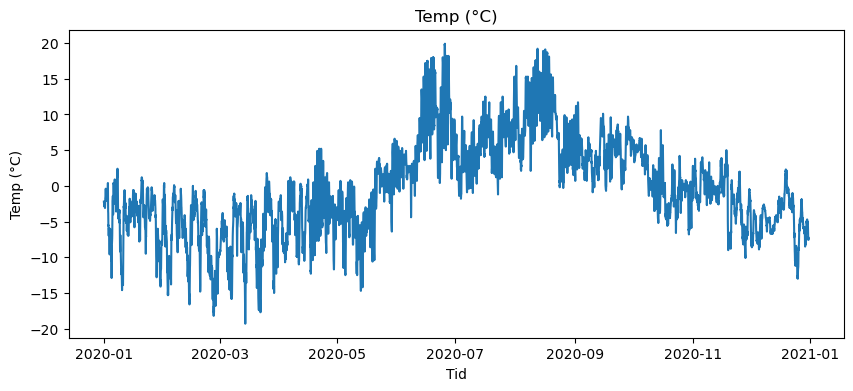

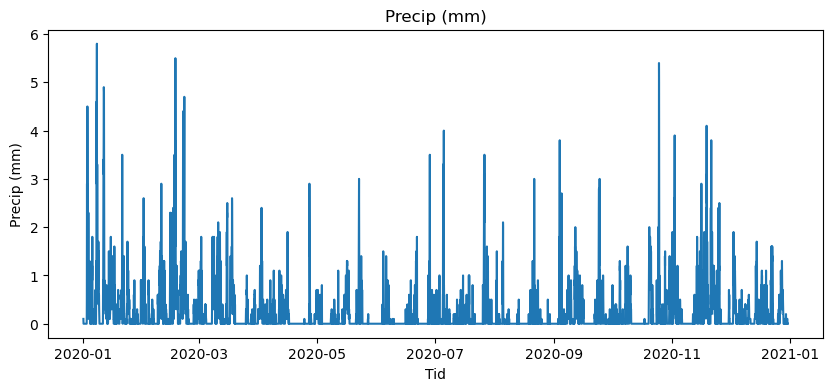

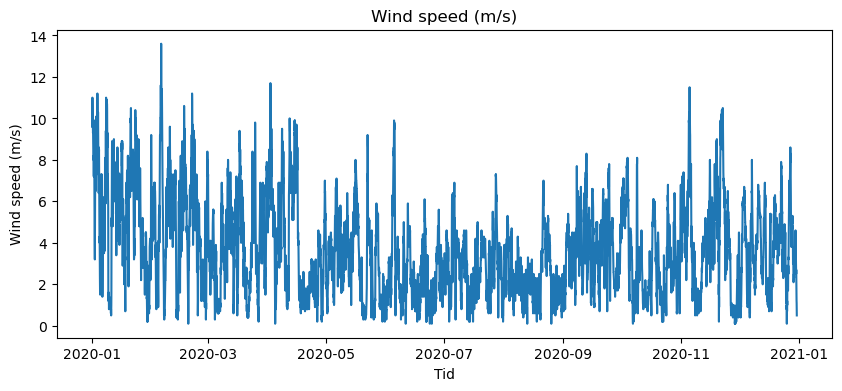

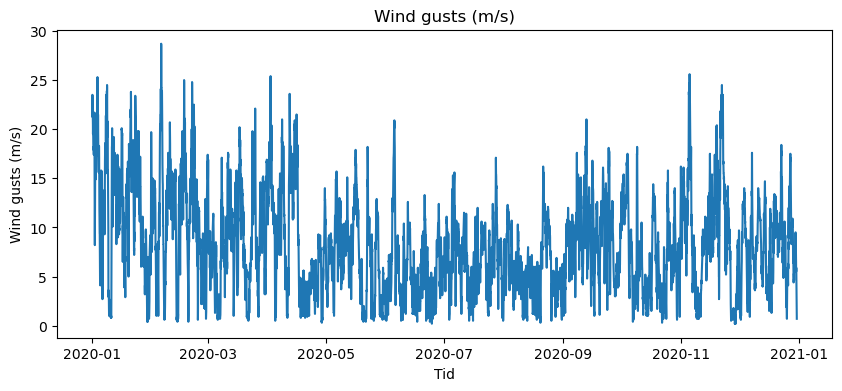

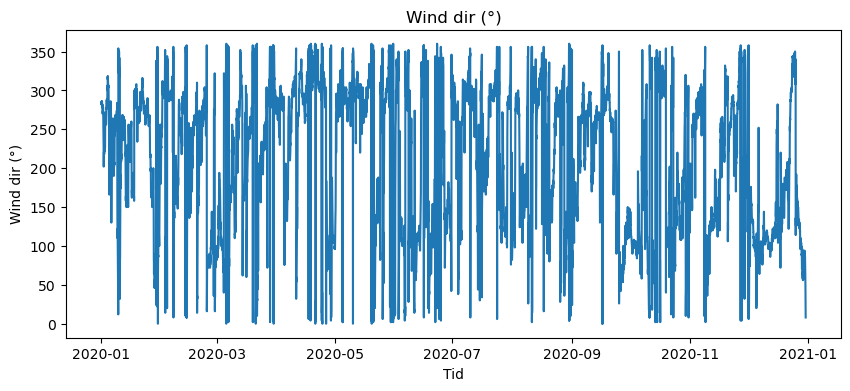

In [24]:
for col in df.columns:
    if col != "time":
        plt.figure(figsize=(10,4))
        plt.plot(df["time"], df[col])
        plt.title(col)
        plt.xlabel("Tid")
        plt.ylabel(col)
        plt.show()


3.4 Plott alle kolonner sammen

C:\Users\adham\AppData\Local\Temp\ipykernel_26868\1316645020.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index("time").resample("M").mean()


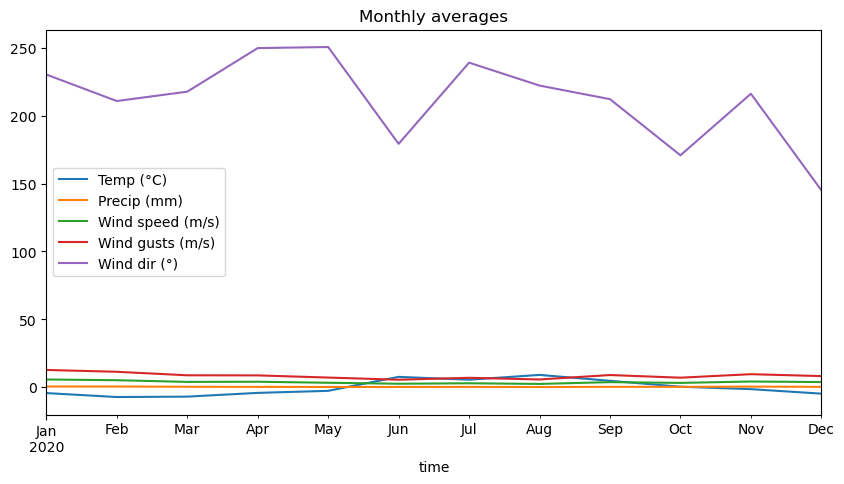

In [25]:
# Resample til månedlige gjennomsnitt og plott disse for alle variabler i samme figur 
df_monthly = df.set_index("time").resample("M").mean()
df_monthly.plot(y=df.columns[1:], figsize=(10,5), title="Monthly averages")
plt.show()


### Lenker til Streamlit og GitHub
https://ind320-adham.streamlit.app/ 

https://github.com/Adham-alsahli/ind320--Adham-Al-Sahli-/tree/main

### LOGG
Jeg startet med å laste inn datasettet open-meteo-subset.csv i Jupyter Notebook ved hjelp av pandas. Deretter undersøkte jeg strukturen på dataene med funksjoner som head(), info() og describe(). Dette ga oversikt over kolonnene og viste at tidskolonnen måtte gjøres om til datetime-format for å kunne brukes i videre analyse. Jeg gjorde også kolonnenavnene kortere og mer oversiktlige, slik at de ble enklere å bruke i både grafer og appen.

Etter dette begynte jeg med visualisering. Først plottet jeg hver variabel separat for å få et inntrykk av hvordan de så ut. Deretter forsøkte jeg å plotte alle variablene sammen, men da ble grafen veldig rotete fordi variablene hadde forskjellige skalaer. For eksempel varierer temperatur mellom ca. –20 og +20 grader, mens vindretning alltid går fra 0 til 360. I tillegg er nedbør nesten alltid nær null, og blir derfor vanskelig å se i samme plott. Løsningen ble å enten splitte grafene opp i grupper eller å aggregere dataene. Jeg valgte å lage måneds-gjennomsnitt ved hjelp av resample("M").mean(), slik at trendene ble mye tydeligere og grafene enklere å lese.

Neste steg var å lage en Streamlit-app. Jeg laget en struktur med fire sider: en velkomstside, en side med en datatabell, en side med plott, og en plassholderside. På første siden brukte jeg LineChartColumn for å vise små grafer direkte i tabellen, mens på plot-siden brukte jeg en selectbox for å velge variabler og en select_slider for å filtrere måneder. Dette gjorde appen interaktiv og i tråd med kravene i oppgaven.

Underveis støtte jeg på flere utfordringer med GitHub og Streamlit. Jeg var ikke helt trygg på Git fra før, og endte opp med å opprette et repository direkte på GitHub-nettsiden. Da jeg prøvde å pushe fra VS Code, fikk jeg feil. Her brukte jeg ChatGPT aktivt til å få steg-for-steg veiledning for å rydde opp i Git-konfigurasjonen og koble prosjektet mitt riktig til GitHub. AI hjalp meg også med å forstå deler av oppgaveteksten og generere forslag til kode, som jeg deretter tilpasset selv.

Totalt sett har jeg lært mye om arbeidsflyten fra dataanalyse til publisering. Jeg føler at jeg har fått en bedre forståelse for hvordan man kan kombinere Jupyter Notebook, Streamlit og GitHub i ett prosjekt.
